In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn-poster')
dataset = pd.read_csv('train.csv')

In [16]:
dataset.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


### Трансформируем данные

In [17]:
for column in ['DayOfWeek', 'PdDistrict', 'Category', 'Resolution']:
    dataset[column] = dataset[column].astype('category')

## Посмотрим, что собираемся предсказывать

### 10 самых частых типов преступлений

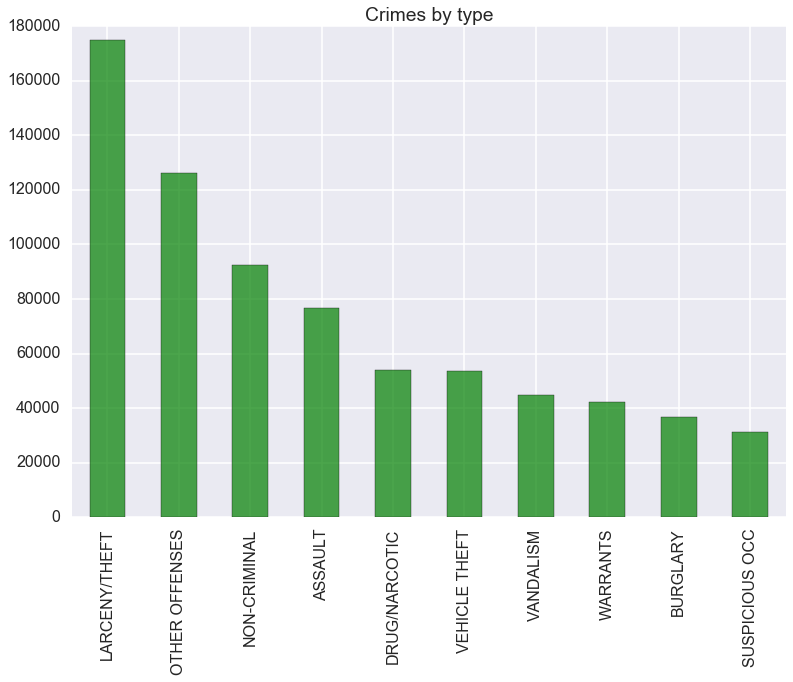

In [18]:
dataset.Category.value_counts()[:10].plot(kind='bar', title='Crimes by type', color='green', alpha=0.7)

### Остальные типы преступлений

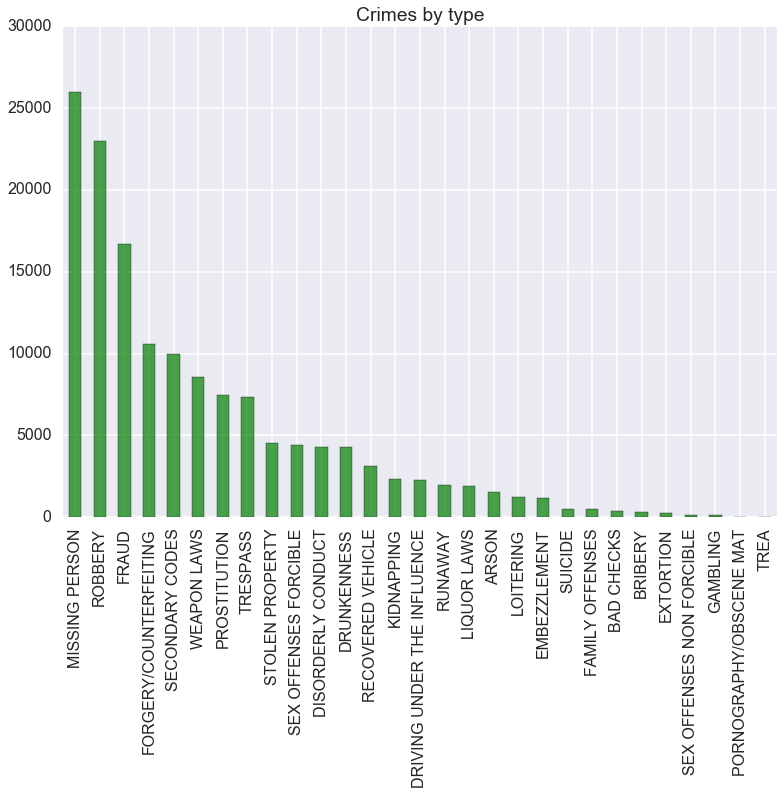

In [19]:
dataset.Category.value_counts()[10:].plot(kind='bar', title='Crimes by type', color='green', alpha=0.7)
plt.show()

## Немного поменяем формат даты/времени
### 1. Сделаем дату типом DateTime

In [20]:
dataset.Dates = pd.to_datetime(dataset.Dates)

### 2. Попробуем вытащить чуть больше из времени

Для этого разделим сутки на 24 промежутка (т.е. промежутки по часу). Запишем для каждого преступления номер временного промежутка, в которое оно произошло.

In [21]:
dataset['Hour'] = pd.Series([date.hour for date in dataset.Dates], dtype="category")

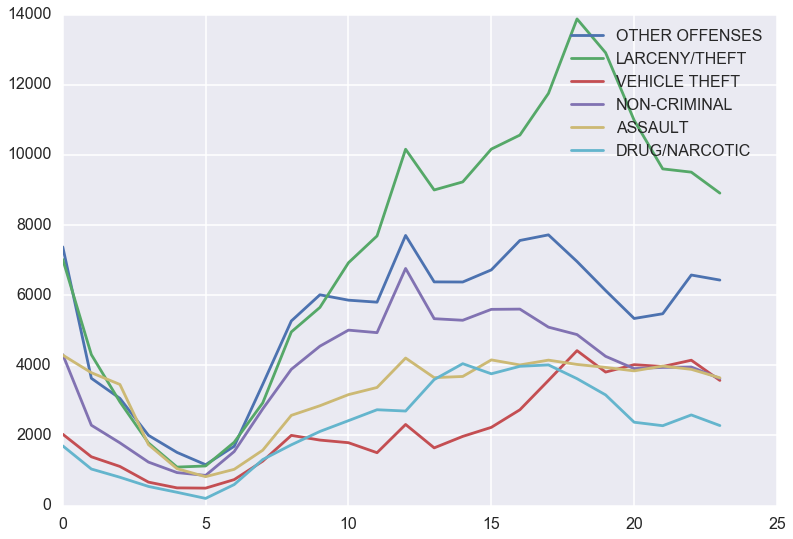

In [22]:
for i, cat in enumerate(dataset.Category.unique()):
    list_ = dataset[dataset.Category == cat].Hour.value_counts().sort_index().tolist()
    if max(list_) > 4000:
        plt.plot(dataset[dataset.Category == cat].Hour.value_counts().sort_index().tolist(), label=cat)
        plt.legend()
        plt.grid(True)

